In [2]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Исследование данных

In [3]:
#получение данных из источника, проверка полей и исключение заведомо бесполезных для моделирования

data = pd.read_csv('/home/dataengineer/OTUS_ML/OTUS_ML_notebooks/data/datasets_180_408_data.csv')
data.info()
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
#получение базовых статистик

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


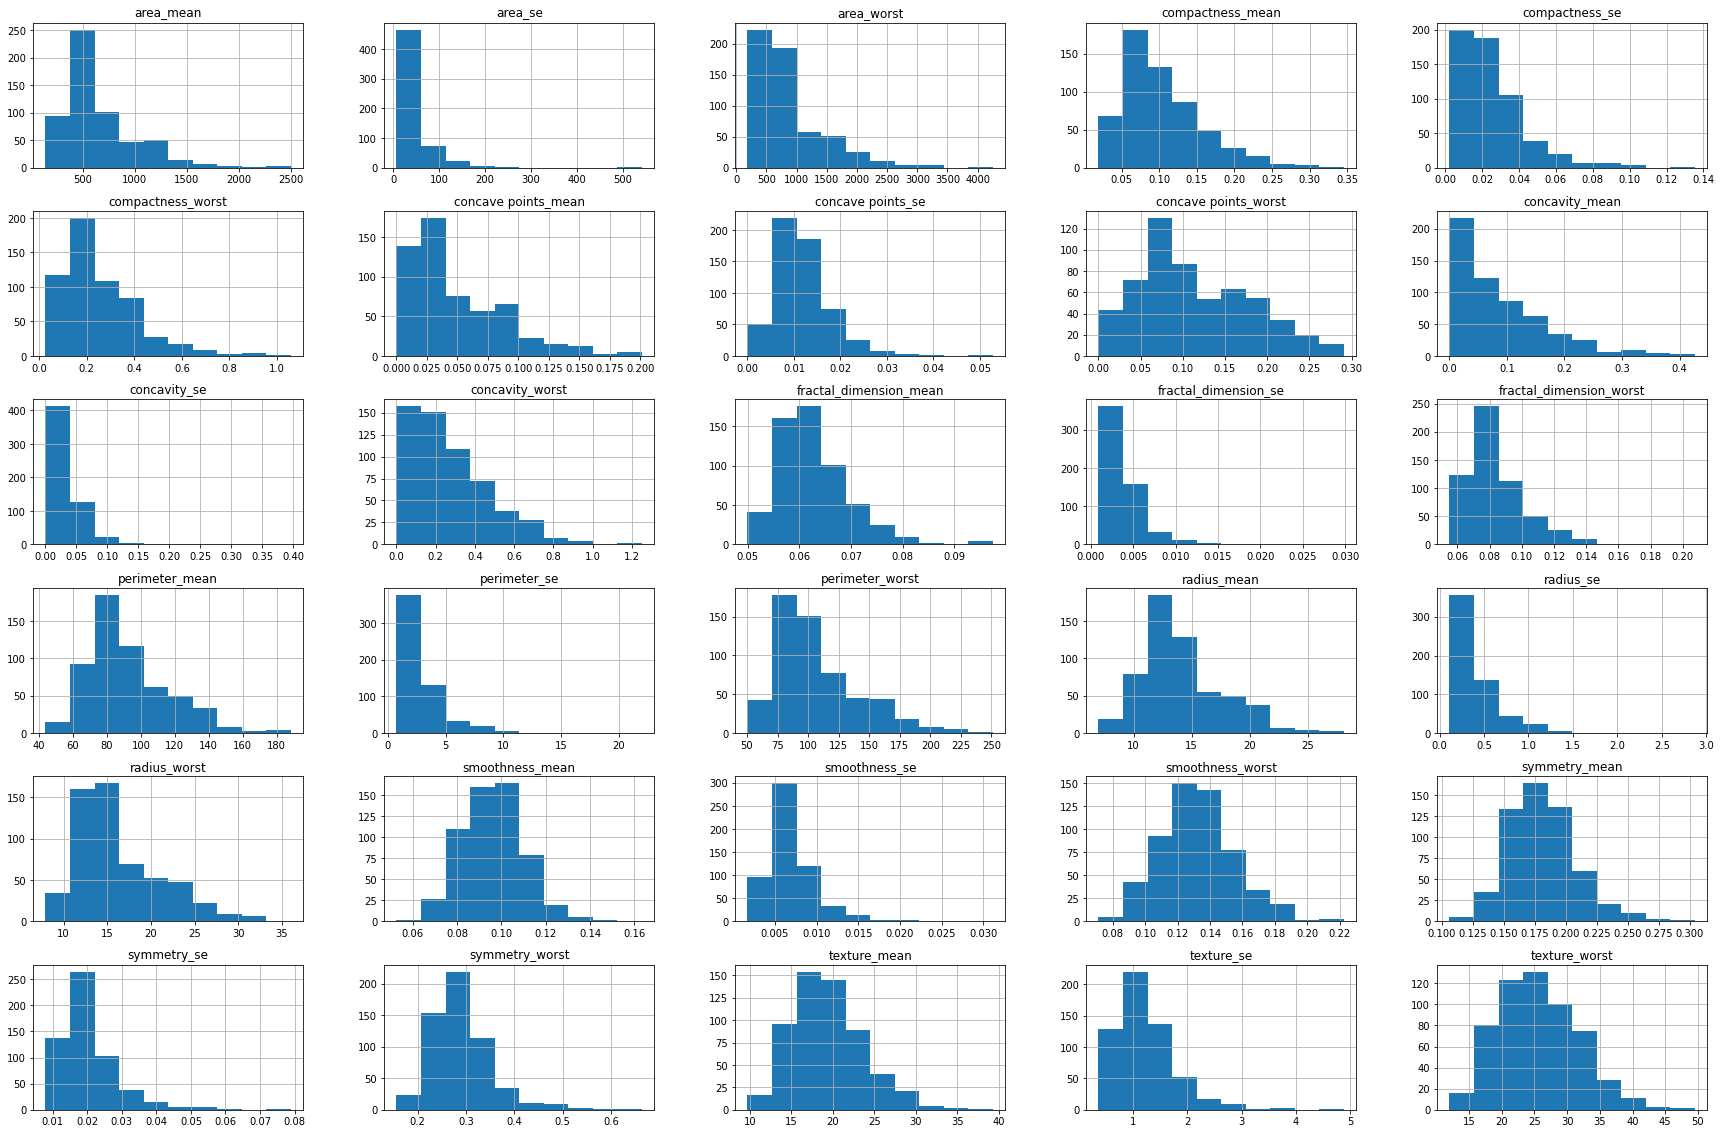

In [71]:
#построение гистограмм для оценки распределения каждого признака

data.hist(figsize=(30, 20));

In [72]:
#sns.pairplot(data, hue='diagnosis');

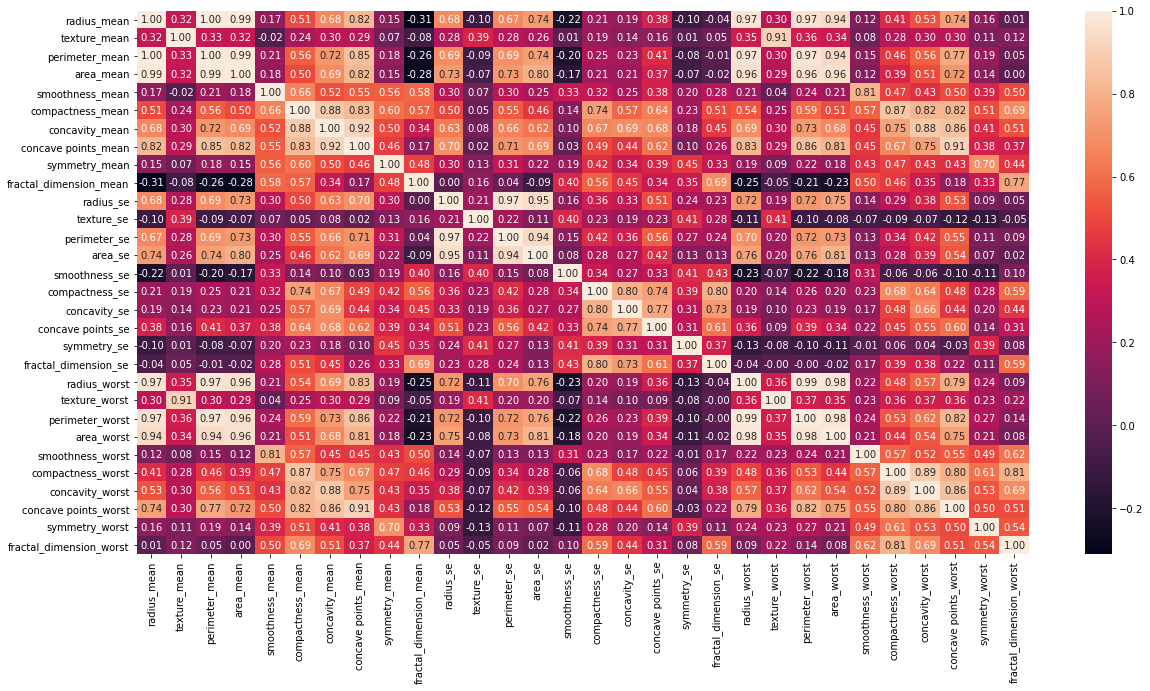

In [73]:
#построение heatmap для оценки корреляции признаков

Corr = data.corr()
plt.figure(figsize=(20,10));
sns.heatmap(Corr, annot=True, fmt='.2f');

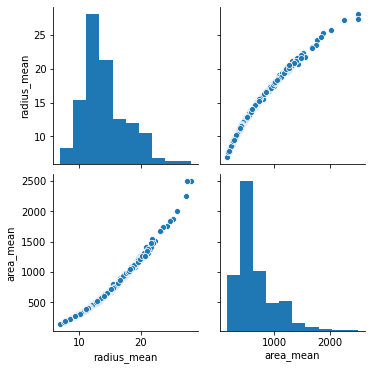

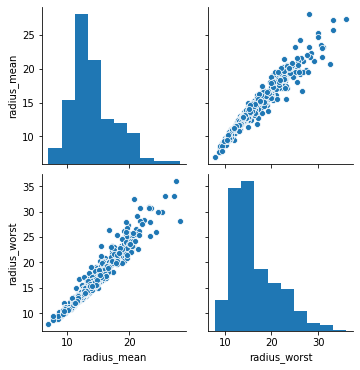

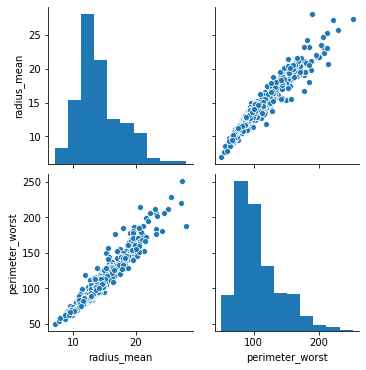

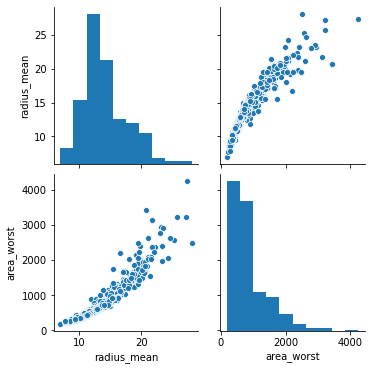

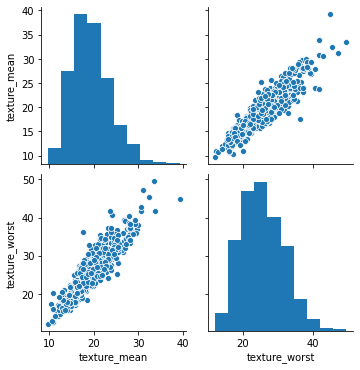

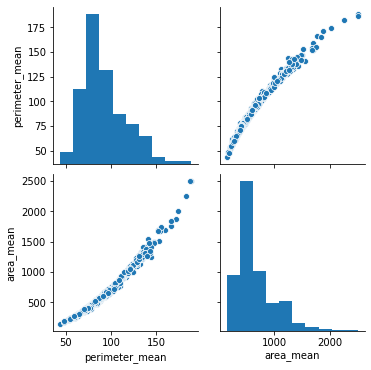

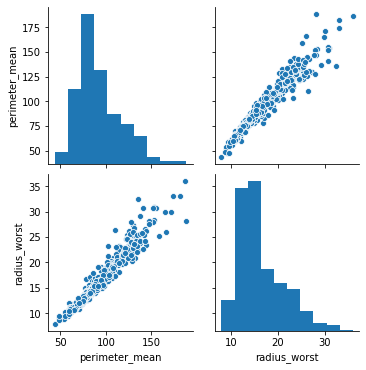

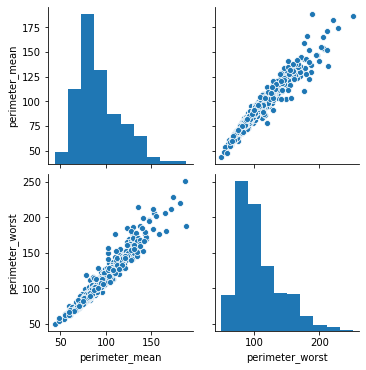

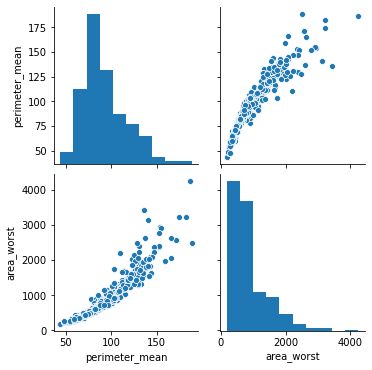

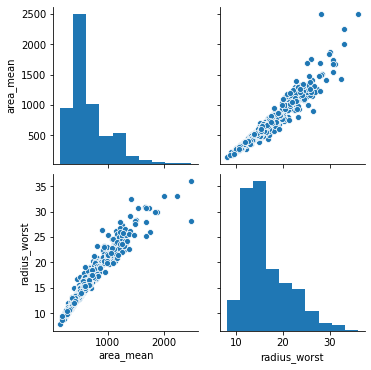

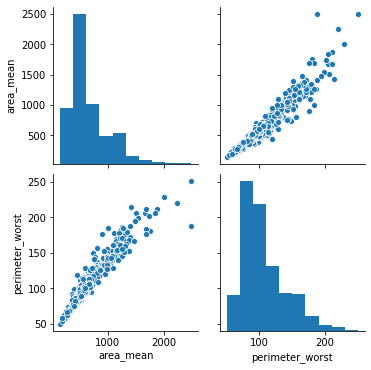

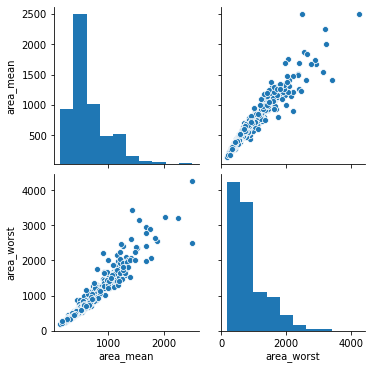

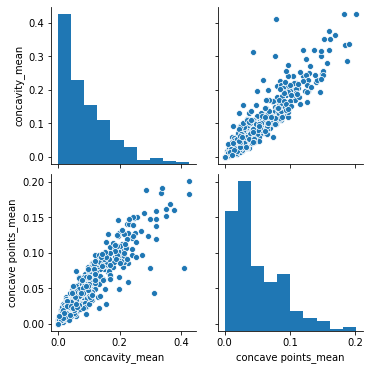

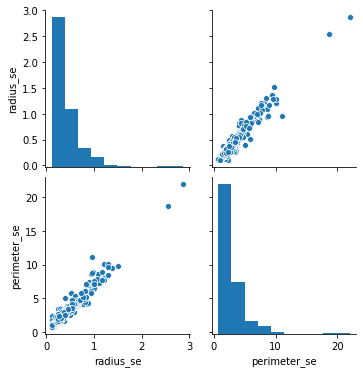

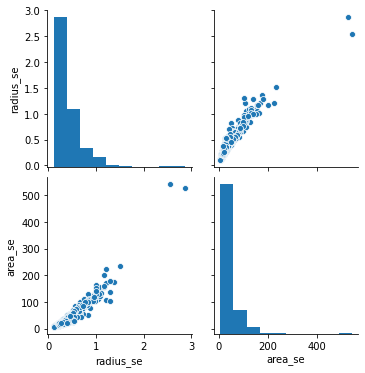

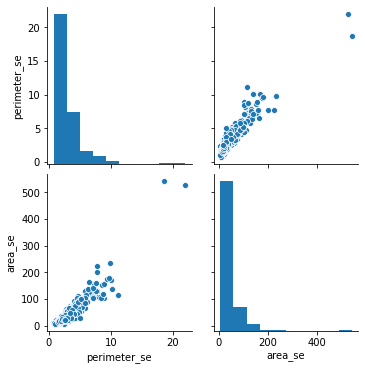

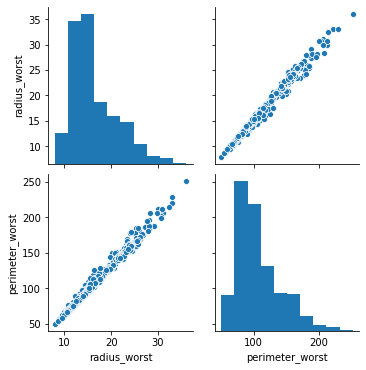

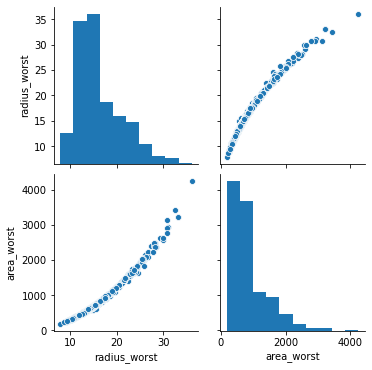

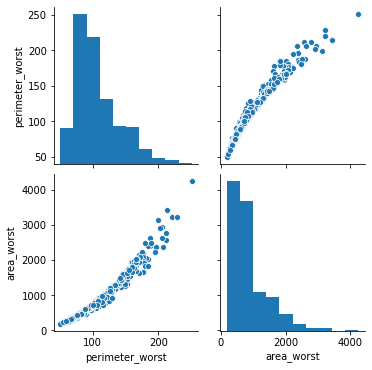

In [74]:
#построение scatterplot для сильно скоррелированных признаков для оценки линейности зависимости

sns.pairplot(data[['radius_mean', 'area_mean']]);
sns.pairplot(data[['radius_mean', 'radius_worst']]);
sns.pairplot(data[['radius_mean', 'perimeter_worst']]);
sns.pairplot(data[['radius_mean', 'area_worst']]);
sns.pairplot(data[['texture_mean', 'texture_worst']]);
sns.pairplot(data[['perimeter_mean', 'area_mean']]);
sns.pairplot(data[['perimeter_mean', 'radius_worst']]);
sns.pairplot(data[['perimeter_mean', 'perimeter_worst']]);
sns.pairplot(data[['perimeter_mean', 'area_worst']]);
sns.pairplot(data[['area_mean', 'radius_worst']]);
sns.pairplot(data[['area_mean', 'perimeter_worst']]);
sns.pairplot(data[['area_mean', 'area_worst']]);
sns.pairplot(data[['concavity_mean', 'concave points_mean']]);
sns.pairplot(data[['radius_se', 'perimeter_se']]);
sns.pairplot(data[['radius_se', 'area_se']]);
sns.pairplot(data[['perimeter_se', 'area_se']]);
sns.pairplot(data[['radius_worst', 'perimeter_worst']]);
sns.pairplot(data[['radius_worst', 'area_worst']]);
sns.pairplot(data[['perimeter_worst', 'area_worst']]);

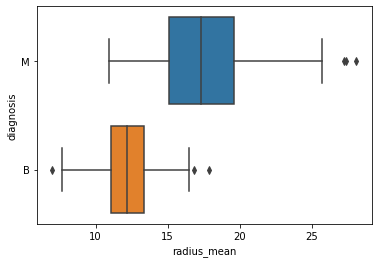

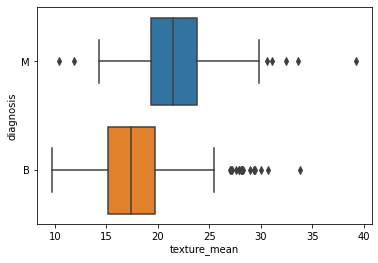

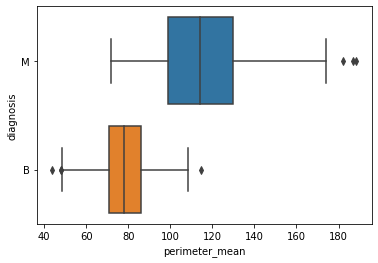

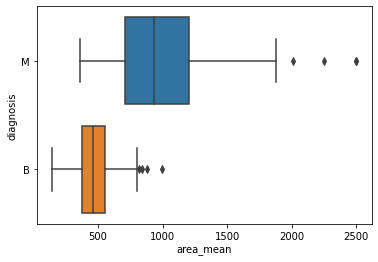

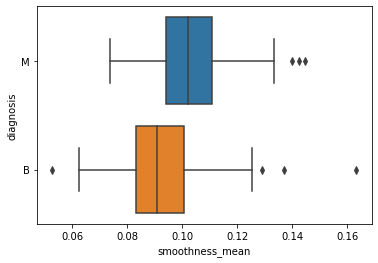

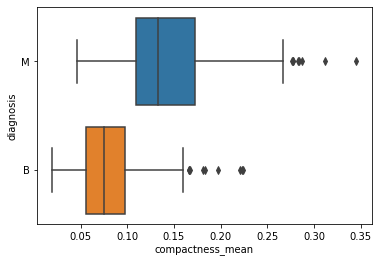

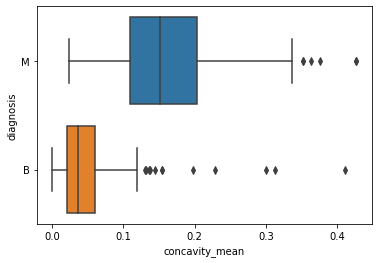

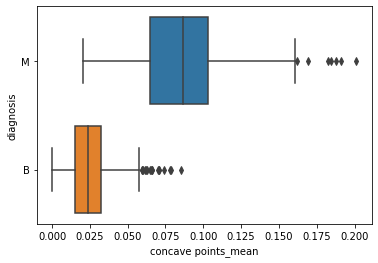

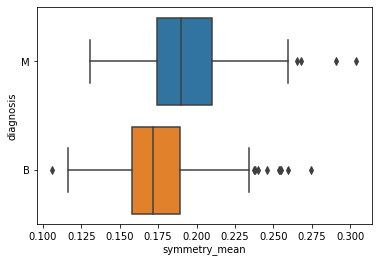

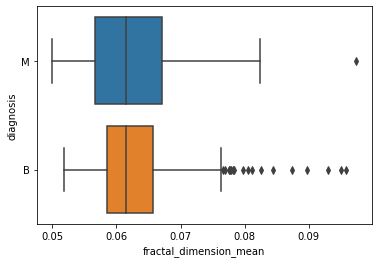

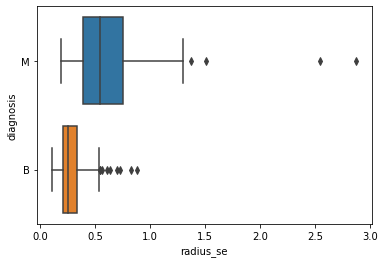

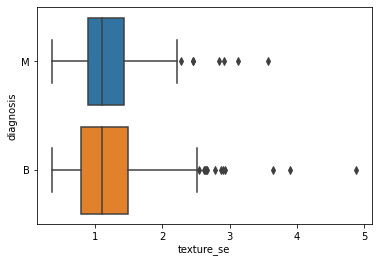

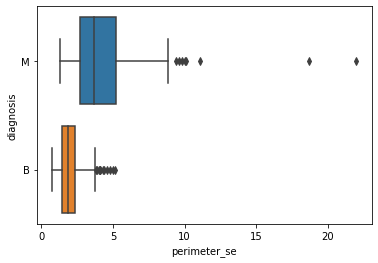

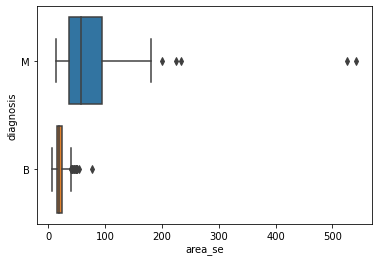

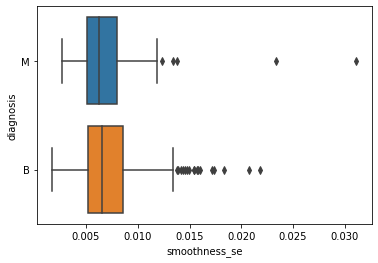

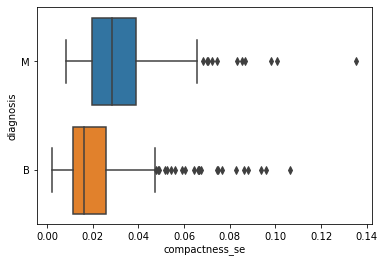

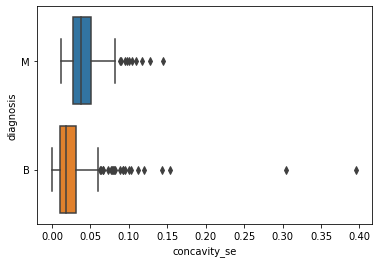

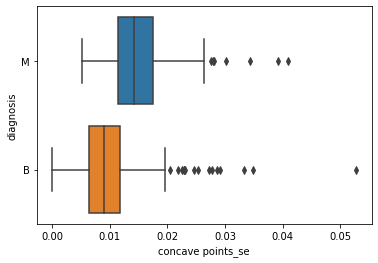

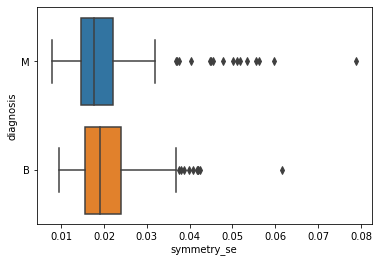

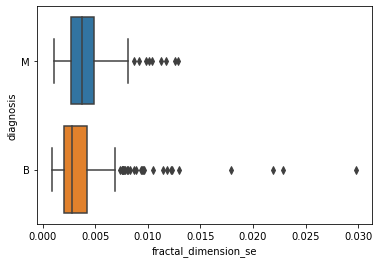

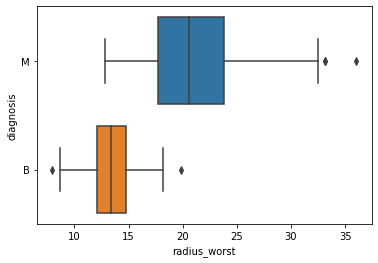

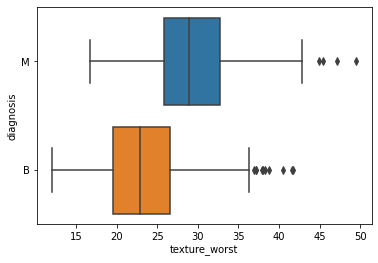

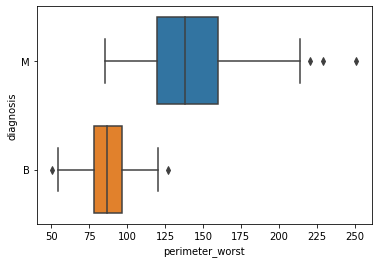

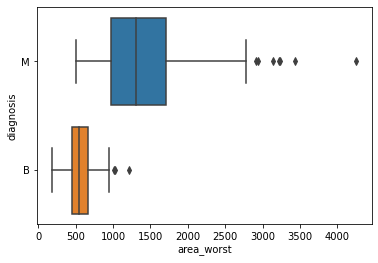

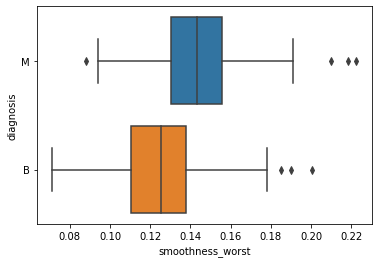

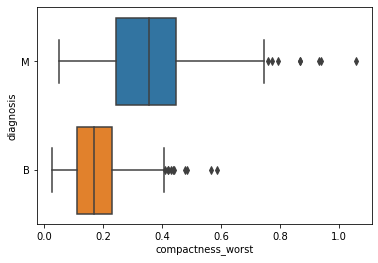

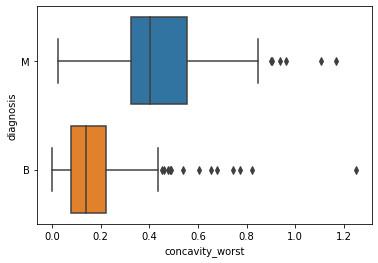

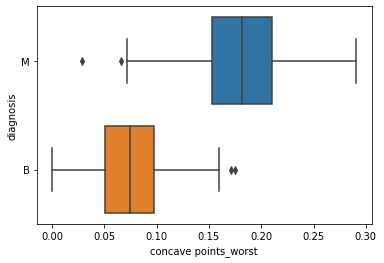

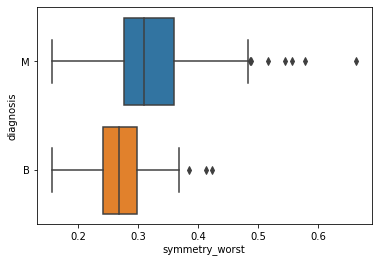

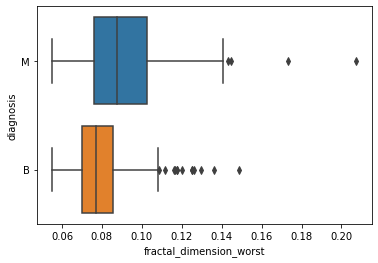

In [75]:
#построение boxplot для каждого признака, сгруппированного по целевой переменной, для оценки распределения

y_field = 'diagnosis'

x_fields = list(data)
del x_fields[x_fields.index(y_field)]

for i in x_fields: 
    sns.boxplot(data=data[[i, y_field]], x = i, y = y_field, orient = "h")
    plt.show()
    

# Моделирование

### Препроцессинг

In [76]:
#кодирование категориальной переменной


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.diagnosis)
data['diagnosis'] = le.transform(data.diagnosis)

In [77]:
#разделение выборки на тренировочную и тестовую

from sklearn.model_selection import train_test_split

y = data.diagnosis
X = data.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
#стандартизация

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform (X_test)

In [79]:
#функция для получения метрик бинарной классификации

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve, auc

def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

### Базовая модель

In [94]:
#построение базовой модели knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model = knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)

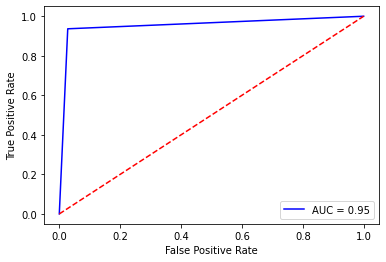

Accuracy:  0.959
Precision: 0.937
Recall:    0.952
F1-score:  0.944


In [95]:
#построение ROC кривой, получение метрик качества базовой модели knn

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

quality(y_pred, y_test)

### Настройка параметров модели  

In [93]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_sc, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
)


Best CV score: 0.954, best CV k: 5


In [83]:
#модель с числом соседей, определенном GridSearchCV

knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)

quality(y_pred, y_test)

Accuracy:  0.959
Precision: 0.937
Recall:    0.952
F1-score:  0.944


In [84]:
#RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

rand_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='f1', random_state=40)
rand_search.fit(X_train_sc, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search.best_score_, rand_search.best_estimator_.n_neighbors)
)


Best CV score: 0.946, best CV k: 13


In [85]:
#модель с числом соседей, определенном RandomizedSearchCV

knn = KNeighborsClassifier(n_neighbors=13)
model = knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)

quality(y_pred, y_test)

Accuracy:  0.965
Precision: 0.937
Recall:    0.967
F1-score:  0.952


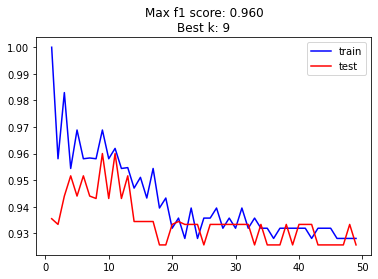

In [86]:
#перебор

neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_sc), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_sc), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max f1 score: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();


In [87]:
#модель с числом соседей, определенном методом перебора

knn = KNeighborsClassifier(n_neighbors=9)
model = knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)

quality(y_pred, y_test)

Accuracy:  0.971
Precision: 0.952
Recall:    0.968
F1-score:  0.960


### Максимально близкое к оптимальному количество соседей было подобрано RandomizedSearchCV